# Creación Modelo Baseline

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv("Copia de Dataset_vuelos.csv",nrows=5500)

In [54]:
drop_cols = ['FlightDate', 'ArrDelay', 'ArrDelayMinutes', 'AirTime']  
df = df.drop(columns=drop_cols)

In [55]:
df_0 = df[df['is_delay'] == 0]
df_1 = df[df['is_delay'] == 1]

In [56]:
df_1_oversampled = df_1.sample(n=len(df_0), replace=True, random_state=42)

In [57]:
df_balanced = pd.concat([df_0, df_1_oversampled]).sample(frac=1, random_state=42)


In [58]:
X = df_balanced.drop(columns=['is_delay'])
y = df_balanced['is_delay']

In [59]:
cat_cols = ['Origin', 'Dest', 'OriginState', 'DestState', 'Reporting_Airline']
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True, dtype=int)


In [60]:
X_encoded.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,...,DestState_CA,DestState_CO,DestState_GA,DestState_IL,DestState_NC,DestState_TX,Reporting_Airline_DL,Reporting_Airline_OO,Reporting_Airline_UA,Reporting_Airline_WN
382,2014,2,5,30,5,835,0.0,0.0,1744.0,7,...,1,0,0,0,0,0,0,0,0,0
5337,2014,3,8,11,1,1425,0.0,0.0,925.0,4,...,0,0,0,1,0,0,0,0,1,0
3075,2018,3,8,4,6,2008,0.0,0.0,1846.0,8,...,1,0,0,0,0,0,0,0,1,0
2113,2015,3,8,21,5,2015,0.0,0.0,651.0,3,...,1,0,0,0,0,0,0,0,0,0
3323,2016,3,7,26,2,600,0.0,0.0,1744.0,7,...,0,0,0,1,0,0,0,0,0,0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y)

In [62]:
model = LogisticRegression(C=0.1, max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000)

In [63]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [64]:
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
ks = max(tpr - fpr)


In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
ks = max(tpr - fpr)

In [66]:
print("Matriz de Confusión:")
print(conf_matrix)
print(f"\nAccuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"KS: {ks:.3f}")

Matriz de Confusión:
[[750 554]
 [525 779]]

Accuracy: 0.586
Precision: 0.584
Recall: 0.597
KS: 0.186


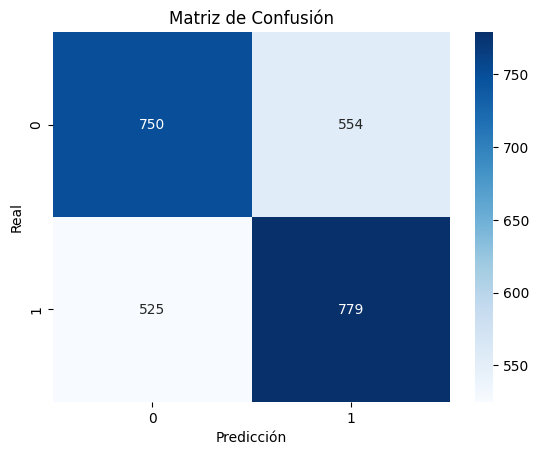

In [67]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()